# Proyecto SQL

El coronavirus tomó al mundo entero por sorpresa, cambiando la rutina diaria de todos y todas. Los habitantes de las ciudades ya no pasaban su tiempo libre fuera, yendo a cafés y centros comerciales; sino que más gente se quedaba en casa, leyendo libros. Eso atrajo la atención de las startups (empresas emergentes) que se apresuraron a desarrollar nuevas aplicaciones para los amantes de los libros.

Te han dado una base de datos de uno de los servicios que compiten en este mercado. Contiene datos sobre libros, editoriales, autores y calificaciones de clientes y reseñas de libros. Esta información se utilizará para generar una propuesta de valor para un nuevo producto.

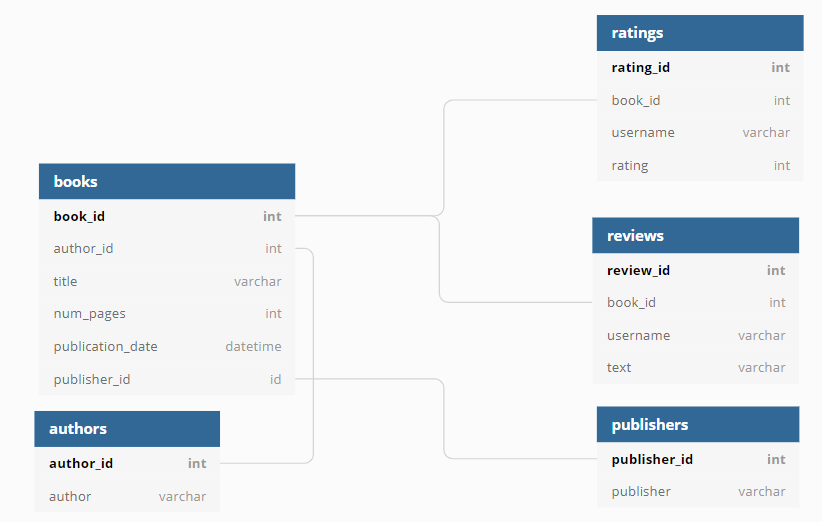

###  Ejercicio ###

. Encuentra el número de libros publicados después del 1 de enero de 2000.

. Encuentra el número de reseñas de usuarios y la calificación promedio para cada libro.

. Identifica la editorial que ha publicado el mayor número de libros con más de 50 páginas (esto te ayudará a excluir folletos y publicaciones similares de tu análisis).

. Identifica al autor que tiene la más alta calificación promedio del libro: mira solo los libros con al menos 50 calificaciones.

. Encuentra el número promedio de reseñas de texto entre los usuarios que calificaron más de 50 libros.

## Importar Librerias

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

## CONECCION A LA BASE DE DATOS

In [2]:
db_config = {'user': 'practicum_student',         
             'pwd': 's65BlTKV3faNIGhmvJVzOqhs', 
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432,              
             'db': 'data-analyst-final-project-db'}          

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                                     db_config['pwd'],
                                                                       db_config['host'],
                                                                       db_config['port'],
                                                                       db_config['db'])

engine = create_engine(connection_string, connect_args={'sslmode':'require'})

In [3]:
# Crear el motor de SQLAlchemy
engine = create_engine(connection_string, connect_args={'sslmode':'require'})


### Descripción de los datos ###

In [4]:
# Lista de tablas a explorar
tablas = ['books', 'authors', 'publishers', 'ratings', 'reviews']

for tabla in tablas:
    try:
        query = f"SELECT * FROM {tabla} LIMIT 5;"
        df = pd.read_sql(query, engine)
        
        print(f"Tabla: {tabla}")
        print(df.isnull().sum()) 
        print(df)
        print("-" * 30)  
    except Exception as e:
        print(f"Error al consultar la tabla {tabla}: {e}")

# Cerrar la conexión
engine.dispose()

Tabla: books
book_id             0
author_id           0
title               0
num_pages           0
publication_date    0
publisher_id        0
dtype: int64
   book_id  author_id                                              title  \
0        1        546                                       'Salem's Lot   
1        2        465                 1 000 Places to See Before You Die   
2        3        407  13 Little Blue Envelopes (Little Blue Envelope...   
3        4         82  1491: New Revelations of the Americas Before C...   
4        5        125                                               1776   

   num_pages publication_date  publisher_id  
0        594       2005-11-01            93  
1        992       2003-05-22           336  
2        322       2010-12-21           135  
3        541       2006-10-10           309  
4        386       2006-07-04           268  
------------------------------
Tabla: authors
author_id    0
author       0
dtype: int64
   author_id        

### Encuentra el número de libros publicados después del 1 de enero de 2000. ###

In [5]:
query = "SELECT COUNT(*) AS cantidad_libros FROM books WHERE publication_date > '2000-01-01';"
df = pd.read_sql(query, con=engine)
print(df)


   cantidad_libros
0              819


### Encuentra el número de reseñas de usuarios y la calificación promedio para cada libro. ###

In [6]:
query = """
SELECT
    r.book_id,
    b.title,
    COUNT(r.review_id) AS cantidad_resenas,
    AVG(rt.rating) AS calificacion_promedio
FROM reviews r
JOIN books b ON r.book_id = b.book_id
JOIN ratings rt ON r.book_id = rt.book_id
GROUP BY r.book_id, b.title
ORDER BY calificacion_promedio DESC;
"""

df = pd.read_sql(query, con=engine)
print(df)


     book_id                                              title  \
0        938                          Triptych (Will Trent  #1)   
1        967               Welcome to Temptation (Dempseys  #1)   
2        347  In the Hand of the Goddess (Song of the Liones...   
3         20              A Fistful of Charms (The Hollows  #4)   
4        390                                    Light in August   
..       ...                                                ...   
989      915  The World Is Flat: A Brief History of the Twen...   
990      202                                      Drowning Ruth   
991      371                                              Junky   
992      316                  His Excellency: George Washington   
993      303                               Harvesting the Heart   

     cantidad_resenas  calificacion_promedio  
0                   4                   5.00  
1                   4                   5.00  
2                   6                   5.00  
3      

### Identifica la editorial que ha publicado el mayor número de libros con más de 50 páginas (esto te ayudará a excluir folletos y publicaciones similares de tu análisis). ###

In [7]:
query = """
SELECT
    p.publisher,
    COUNT(b.book_id) AS cantidad_libros
FROM books b
JOIN publishers p ON b.publisher_id = p.publisher_id
WHERE b.num_pages > 50
GROUP BY p.publisher 
ORDER BY cantidad_libros DESC
"""

df = pd.read_sql(query, con=engine)
print(df)

                                             publisher  cantidad_libros
0                                        Penguin Books               42
1                                              Vintage               31
2                             Grand Central Publishing               25
3                                     Penguin Classics               24
4                                     Ballantine Books               19
..                                                 ...              ...
329                                         Turtleback                1
330  Atheneum Books for Young Readers: Richard Jack...                1
331                                     Penguin Signet                1
332                                    Victor Gollancz                1
333                      Harvard Business Review Press                1

[334 rows x 2 columns]


### Identifica al autor que tiene la más alta calificación promedio del libro: mira solo los libros con al menos 50 calificaciones. ###

In [8]:
query = """
SELECT
    a.author,
    AVG(rt.rating) AS calificacion_promedio
FROM books b
JOIN authors a ON b.author_id = a.author_id
JOIN ratings rt ON b.book_id = rt.book_id
GROUP BY a.author 
HAVING COUNT(rt.rating_id) >=50
ORDER BY calificacion_promedio DESC
LIMIT 1;
"""

df = pd.read_sql(query, con=engine)
print(df)

           author  calificacion_promedio
0  Diana Gabaldon                    4.3


### Encuentra el número promedio de reseñas de texto entre los usuarios que calificaron más de 50 libros. ###

In [27]:
query = """
SELECT
    AVG(promedio_longitud) AS promedio_longitud_resenas
FROM (
    SELECT
        username,
        AVG(LENGTH(text)) AS promedio_longitud
    FROM
        reviews
    WHERE
        username IN (SELECT username FROM ratings GROUP BY username HAVING COUNT(rating_id) > 50)
    GROUP BY
        username
) AS subquery;
"""

df = pd.read_sql(query, con=engine)
print(df)

   promedio_longitud_resenas
0                  87.934632


### Calificación Promedio de los 10 Mejores Autores (con al menos 50 calificaciones) ###

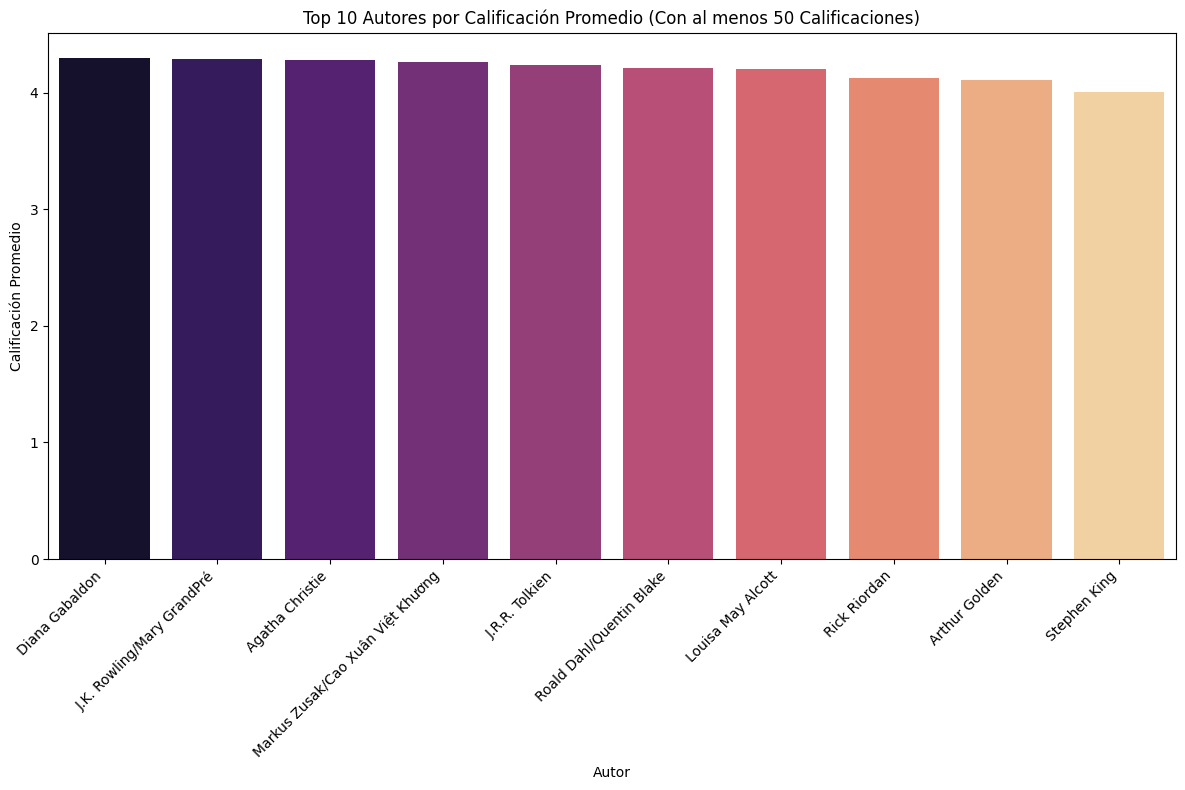

In [19]:
query = """
SELECT
    a.author,
    AVG(rt.rating) AS calificacion_promedio
FROM books b
JOIN authors a ON b.author_id = a.author_id
JOIN ratings rt ON b.book_id = rt.book_id
GROUP BY a.author
HAVING COUNT(rt.rating_id) >= 50
ORDER BY calificacion_promedio DESC
LIMIT 10;
"""
df = pd.read_sql(query, con=engine)

plt.figure(figsize=(12, 8))
sns.barplot(x='author', y='calificacion_promedio', data=df, palette='magma') 
plt.title('Top 10 Autores por Calificación Promedio (Con al menos 50 Calificaciones)')
plt.xlabel('Autor')
plt.ylabel('Calificación Promedio')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

### Número de Libros Publicados por Año ###

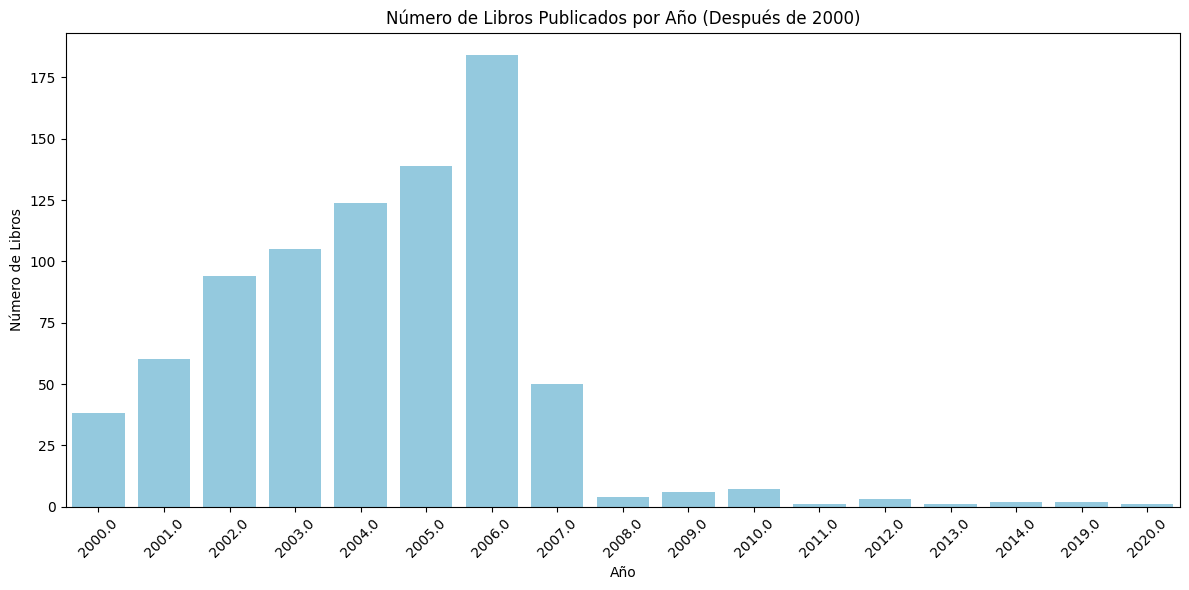

In [14]:
query = """
SELECT EXTRACT(YEAR FROM publication_date) AS year, COUNT(*) AS num_books
FROM books
WHERE publication_date >= '2000-01-01'
GROUP BY year
ORDER BY year;
"""
df = pd.read_sql(query, con=engine)

plt.figure(figsize=(12, 6))  
sns.barplot(x='year', y='num_books', data=df, color='skyblue') 
plt.title('Número de Libros Publicados por Año (Después de 2000)')
plt.xlabel('Año')
plt.ylabel('Número de Libros')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

### Conclusiones ###

El análisis de la fecha de publicación permitió identificar tendencias en la industria del libro después del año 2000, así como identificar los libros más populares y mejor calificados, editoriales con mayor enfoque en publicaciones sustanciales, destacar a los autores más apreciados por los lectores y patrones en las reseñas de usuarios.

Estos datos pueden ser valiosos para Editoriales que quiran identificar tendencias y autores populares para futuras publicaciones, a los autores para saber que tipos de libros prefieren los lectores.